In [1]:
from config import meetup_key
import requests
import json
import os
import pandas as pd
import time

In [3]:
filepath = os.path.join("clean_temp_2")
city_df = pd.read_csv(filepath)

In [4]:
city_clean = city_df.drop(city_df.columns[[0,1]], axis=1)
city_clean.head()

,zcta,Median Age,Education Score,per_capita_inc,Diversity,population,lat,lon,city,temp
0,688,39.3,0,7870.0,Non Diverse,13543.0,18.382264,-66.626438,florida,60.82
1,745,38.5,1,10499.0,Diverse,55062.0,18.352840,-65.817813,rio grande,45.70
2,1007,42.2,1,34278.0,Non Diverse,14649.0,42.279010,-72.400468,belchertown,41.54
3,1020,43.7,1,28032.0,Non Diverse,29668.0,42.172698,-72.561835,chicopee,41.86
4,1030,44.0,1,31713.0,Non Diverse,11669.0,42.072925,-72.686972,agawam,42.17


In [12]:
counter = 0
url = "https://api.meetup.com/find/venues"
zcta = city_clean['zcta']

city = []
rating = []
rating_count = []
temp = []
lat = []
lon = []
zcta_list = []

for i in range(len(city_clean)):
    params = {
        "key": meetup_key,
        "text": f"{zcta[i]}",
        "zip": zcta[i],
        "page": 30,
        "order": 'rating_count',
        "desc": True
    }
    request = requests.get(url, params=params)
    data = request.json()
    len_call = len(data)
    
    print(f"{counter} {len_call}")
    counter = counter + 1
    
    if int(request.headers['X-RateLimit-Remaining']) <= 2:
        time.sleep(10)
    try:
        for j in range(len_call):
            city.append(city_clean['city'][i])
            temp.append(city_clean['temp'][i])
            rating.append(data[j]['rating'])
            rating_count.append(data[j]['rating_count'])
            lat.append(data[j]['lat'])
            lon.append(data[j]['lon'])
            zcta_list.append(zcta[i])
    except KeyError:
        print("uh oh")
    

0 1
1 3
2 16
3 11
4 11
5 1
6 2
7 1
8 5
9 0
10 0
11 1
12 4
13 1
14 30
15 7
16 11
17 6
18 2
19 1
20 29
21 3
22 10
23 5
24 4
25 19
26 7
27 15
28 10
29 24
30 23
31 11
32 16
33 10
34 5
35 4
36 9
37 4
38 28
39 26
40 24
41 6
42 12
43 22
44 13
45 9
46 6
47 20
48 11
49 20
50 8
51 5
52 7
53 4
54 6
55 2
56 6
57 8
58 2
59 3
60 2
61 4
62 11
63 0
64 0
65 1
66 9
67 1
68 1
69 0
70 1
71 4
72 1
73 2
74 6
75 2
76 13
77 3
78 3
79 1
80 7
81 2
82 2
83 0
84 0
85 0
86 8
87 1
88 0
89 7
90 0
91 1
92 4
93 1
94 0
95 1
96 0
97 0
98 0
99 0
100 0
101 1
102 0
103 0
104 1
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 4
114 1
115 0
116 1
117 1
118 11
119 0
120 3
121 0
122 1
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 1
132 0
133 0
134 0
135 0
136 0
137 1
138 0
139 1
140 0
141 0
142 1
143 0
144 3
145 0
146 3
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 3
157 1
158 1
159 2
160 0
161 0
162 1
163 0
164 0
165 4
166 0
167 0
168 2
169 6
170 0
171 5
172 0
173 0
174 0
175 1
176 0
177 0
178 2
179 0
180

1241 1
1242 0
1243 28
1244 30
1245 0
1246 0
1247 26
1248 28
1249 26
1250 28
1251 25
1252 0
1253 0
1254 0
1255 0
1256 4
1257 0
1258 0
1259 0
1260 0
1261 0
1262 1
1263 1
1264 8
1265 0
1266 0
1267 24
1268 28
1269 5
1270 30
1271 7
1272 30
1273 30
1274 18
1275 27
1276 29
1277 27
1278 28
1279 4
1280 4
1281 18
1282 28
1283 8
1284 2
1285 0
1286 4
1287 1
1288 2
1289 29
1290 25
1291 30
1292 29
1293 9
1294 25
1295 4
1296 29
1297 0
1298 1
1299 27
1300 20
1301 28
1302 28
1303 24
1304 1
1305 15
1306 25
1307 29
1308 28
1309 29
1310 30
1311 3
1312 28
1313 28
1314 29
1315 28
1316 15
1317 29
1318 10
1319 25
1320 25
1321 28
1322 26
1323 24
1324 30
1325 29
1326 26
1327 13
1328 29
1329 29
1330 17
1331 30
1332 7
1333 17
1334 27
1335 3
1336 21
1337 30
1338 30
1339 26
1340 30
1341 2
1342 5
1343 20
1344 19
1345 30
1346 26
1347 30
1348 1
1349 8
1350 2
1351 29
1352 3
1353 30
1354 2
1355 2
1356 25
1357 4
1358 0
1359 0
1360 0
1361 25
1362 10
1363 0
1364 1
1365 30
1366 27
1367 27
1368 28
1369 28
1370 14
1371 29
137

2332 26
2333 15
2334 28
2335 2
2336 17
2337 29
2338 30
2339 29
2340 2
2341 3
2342 8
2343 30
2344 30
2345 14
2346 29
2347 26
2348 3
2349 30
2350 19
2351 16
2352 16
2353 7
2354 3
2355 8
2356 0
2357 13
2358 1
2359 0
2360 1
2361 0
2362 28
2363 28
2364 29
2365 29
2366 28
2367 10
2368 27
2369 28
2370 7
2371 27
2372 27
2373 0
2374 0
2375 0
2376 28
2377 2
2378 0
2379 6
2380 1
2381 23
2382 5
2383 0
2384 1
2385 13
2386 0
2387 1
2388 24
2389 30
2390 1
2391 29
2392 16
2393 24
2394 2
2395 4
2396 0
2397 0
2398 29
2399 30
2400 30
2401 28
2402 28
2403 29
2404 0
2405 0
2406 0
2407 1
2408 11
2409 0
2410 1
2411 0
2412 1
2413 2
2414 0
2415 0
2416 0
2417 0
2418 1
2419 0
2420 0
2421 10
2422 23
2423 0
2424 0
2425 2
2426 0
2427 0
2428 30
2429 0
2430 0
2431 0
2432 3
2433 5
2434 0
2435 0
2436 10
2437 0
2438 0
2439 0
2440 30
2441 28
2442 28
2443 29
2444 26
2445 3
2446 11
2447 29
2448 29
2449 28
2450 27
2451 30
2452 27
2453 27
2454 28
2455 26
2456 30
2457 28
2458 30
2459 1
2460 29
2461 5
2462 15
2463 30
2464 29
2

In [29]:
venue_weather_df = pd.DataFrame({"zcta": zcta_list, "city": city, "lat": lat, "lon": lon, "temp": temp, "rating": rating, "rating_count": rating_count})
zcta_groupby = venue_weather_df.groupby('zcta')
zctsa_rating_mean = zcta_groupby.mean()
zctsa_rating_mean.head()
# zcta_avg_rating = zctsa_rating_mean.reset_index()
# zcta_avg_rating.head()

,lat,lon,rating,rating_count,temp
zcta,,,,,
688,30.238016,-97.739487,0.000000,0.000000,60.82
745,30.253042,-97.716128,3.250000,1.666667,45.70
1007,30.243035,-97.753898,1.167500,0.937500,41.54
1020,30.256384,-97.741433,1.970000,0.727273,41.86
1030,30.263786,-97.736129,1.229091,1.818182,42.17


In [31]:
grouby_city_pop = city_clean.groupby('zcta').mean()
grouby_city_pop = grouby_city_pop.drop(grouby_city_pop.columns[[ 0, 1, 2, 4, 5, 6]], axis=1)
grouby_city_pop.head()
# grouby_city_pop_rest = grouby_city_pop.reset_index()
# grouby_city_pop_rest.head()

,population
zcta,
688,13543.0
745,55062.0
1007,14649.0
1020,29668.0
1030,11669.0


In [45]:
merge_pop_rating = grouby_city_pop.join(zctsa_rating_mean)
merge_pop_rating = merge_pop_rating[merge_pop_rating['rating'] != 0]
merge_pop_rating = merge_pop_rating[merge_pop_rating['rating_count'] > 10]
merge_pop_rating.head()

,population,lat,lon,rating,rating_count,temp
zcta,,,,,,
1040,39880.0,30.257534,-97.737041,4.310000,39.000000,41.88
1529,3190.0,30.269447,-97.753004,4.043333,13.166667,45.72
1545,35299.0,30.273552,-97.799202,4.570000,14.000000,43.09
1583,7591.0,30.258627,-97.756767,2.552000,12.200000,42.21
2302,32741.0,30.241628,-97.782946,4.613333,25.000000,46.40


In [53]:
merge_pop_rating_df = merge_pop_rating.reset_index()
merge_pop_rating_df.head()

,zcta,population,lat,lon,rating,rating_count,temp
0,1040,39880.0,30.257534,-97.737041,4.310000,39.000000,41.88
1,1529,3190.0,30.269447,-97.753004,4.043333,13.166667,45.72
2,1545,35299.0,30.273552,-97.799202,4.570000,14.000000,43.09
3,1583,7591.0,30.258627,-97.756767,2.552000,12.200000,42.21
4,2302,32741.0,30.241628,-97.782946,4.613333,25.000000,46.40


In [78]:
len(merge_pop_rating_df)

881

In [243]:
# add meetup info

url_groups = "https://api.meetup.com/2/cities"

zcta_list = []
member_count = []

counter = 0

for i in range(len(merge_pop_rating_df)):
    params2 = {
        "key": meetup_key,
        "lon": f"{merge_pop_rating_df['lon'][i]}",
        "lat": f"{merge_pop_rating_df['lat'][i]}",
        "page": 1,
        "radius": 5,
        "order": 'distance'
    }
    request = requests.get(url_groups, params=params2)
    
    try:
        data = request.json()
        len_call = len(data['results'])
    
        print(f"{counter} {len_call}")
        counter = counter + 1
    
        if int(request.headers['X-RateLimit-Remaining']) <= 2:
            time.sleep(10)

    
        for row in data['results']:
            zcta_list.append(merge_pop_rating_df['zcta'][i])
            member_count.append(row['member_count'])
    except ValueError:
        print("uh oh")

0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 1
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
uh oh
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1
100 1
101 1
102 1
103 1
104 1
105 1
106 1
107 1
108 1
109 1
110 1
111 1
112 1
113 1
114 1
115 1
116 1
117 1
118 1
119 1
120 1
121 1
122 1
123 1
124 1
125 1
126 1
127 1
128 1
129 1
130 1
131 1
132 1
133 1
134 1
135 1
136 1
137 0
138 1
139 1
140 1
141 1
142 1
143 1
144 1
145 1
146 0
147 0
148 0
149 1
150 1
uh oh
151 0
152 1
153 1
154 1
155 1
156 1
157 1
158 1
159 0
160 1
161 1
162 1
163 1
164 1
165 1
166 1
167 1
168 1
169 1
170 1
171 1
172 1
173 1
174 1
175 1
176 1
177 1
178 1
179 1
180 1
181 1
182 1


In [244]:
zcta_member_df = pd.DataFrame({"zcta": zcta_list, "member_count": member_count})
zcta_member = zcta_member_df.groupby('zcta').sum()
zcta_member.head()

,member_count
zcta,
1040,57163
1529,57163
1545,57163
1583,57163
2302,57163


In [245]:
pop_member_merge = merge_pop_rating.join(zcta_member)
pop_member_merge.head()

,population,lat,lon,rating,rating_count,temp,member_count
zcta,,,,,,,
1040,39880.0,30.257534,-97.737041,4.310000,39.000000,41.88,57163.0
1529,3190.0,30.269447,-97.753004,4.043333,13.166667,45.72,57163.0
1545,35299.0,30.273552,-97.799202,4.570000,14.000000,43.09,57163.0
1583,7591.0,30.258627,-97.756767,2.552000,12.200000,42.21,57163.0
2302,32741.0,30.241628,-97.782946,4.613333,25.000000,46.40,57163.0


In [246]:
final_data = pop_member_merge.reset_index()

In [247]:
clean_final_data = final_data.dropna(subset=[['temp', 'member_count', 'population']])
clean_final_data.head()

,zcta,population,lat,lon,rating,rating_count,temp,member_count
0,1040,39880.0,30.257534,-97.737041,4.310000,39.000000,41.88,57163.0
1,1529,3190.0,30.269447,-97.753004,4.043333,13.166667,45.72,57163.0
2,1545,35299.0,30.273552,-97.799202,4.570000,14.000000,43.09,57163.0
3,1583,7591.0,30.258627,-97.756767,2.552000,12.200000,42.21,57163.0
4,2302,32741.0,30.241628,-97.782946,4.613333,25.000000,46.40,57163.0


In [259]:
# choose random sample
sample_100_data = clean_final_data.sample(n=100)
sample_100_data.dropna(inplace=True)

In [260]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kendalltau
import seaborn as sns
sns.set(style="ticks")



In [261]:
pop_pen = sample_100_data['member_count'] / sample_100_data['population']

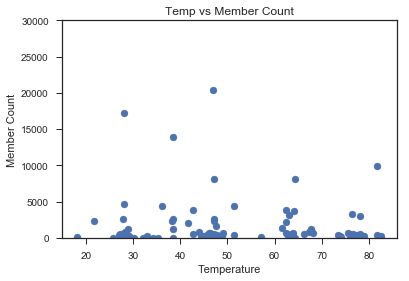

In [272]:
# sns.jointplot(sample_100_data['temp'], sample_100_data['member_count'], kind="hex", stat_func=kendalltau, color="#4CB391")
plt.scatter(sample_100_data['temp'], sample_100_data['member_count'])
plt.xlabel('Temperature')
plt.ylabel('Member Count')
plt.ylim((0, 30000))
plt.title('Temp vs Member Count')
plt.savefig('Temp_vs_Member_Count.png', bbox_inches='tight')
plt.show()

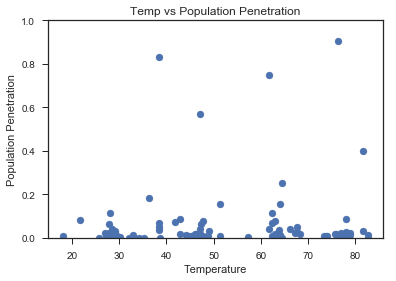

In [273]:
# sns.jointplot(sample_100_data['temp'], pop_pen, kind="hex", stat_func=kendalltau, color="#4CB391")
plt.scatter(sample_100_data['temp'], pop_pen)
plt.xlabel('Temperature')
plt.ylabel('Population Penetration')
plt.ylim((0,1))
plt.title('Temp vs Population Penetration')
plt.savefig('Temp_vs_Population_Penetration.png', bbox_inches='tight')
plt.show()

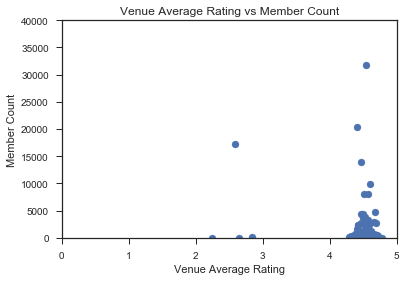

In [274]:
# sns.jointplot(sample_100_data['rating'], sample_100_data['member_count'], kind="hex", stat_func=kendalltau, color="#4CB391")
plt.scatter(sample_100_data['rating'], sample_100_data['member_count'])
plt.xlabel('Venue Average Rating')
plt.ylabel('Member Count')
plt.ylim((0, 40000))
plt.xlim((0,5))
plt.title('Venue Average Rating vs Member Count')
plt.savefig('Venue_Average_Rating_vs_Member_Count.png', bbox_inches='tight')
plt.show()

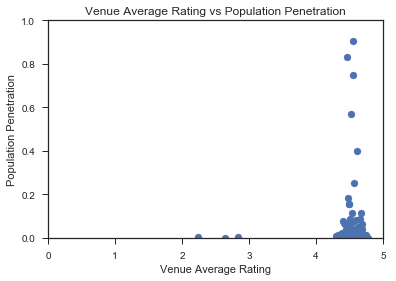

In [275]:
# sns.jointplot(sample_100_data['rating'], pop_pen, kind="hex", stat_func=kendalltau, color="#4CB391")
plt.scatter(sample_100_data['rating'], pop_pen)
plt.xlabel('Venue Average Rating')
plt.ylabel('Population Penetration')
plt.ylim((0,1))
plt.xlim((0,5))
plt.title('Venue Average Rating vs Population Penetration')
plt.savefig('Venue_Average_Rating_vs_Population_Penetration.png', bbox_inches='tight')
plt.show()